# Exercises

## A. Basics

### Exercise 1

Load the Iris data into a `DataFrame` and print the shape of the data, the type of the data, and the first 3 rows.

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

iris = sns.load_dataset('iris')

In [2]:
iris.shape

(150, 5)

In [3]:
type(iris)

pandas.core.frame.DataFrame

In [4]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### Exercise 2

Print the keys of the Iris data.

In [5]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Exercise 3

Get the number of observations and missing values of the Iris data.

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exercise 4

View basic statistical details like percentiles, mean, standard deviation, etc., of the Iris data.

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exercise 5

Get observations of each species (setosa, versicolor, virginica) from the Iris data.

In [8]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Exercise 6

Access the first four columns for the first observation from the Iris data.

In [10]:
iris.iloc[0, :4]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: object

## B. Visualization

### Exercise 1

Create a bar plot to get the frequency of the 3 species of the Iris data.

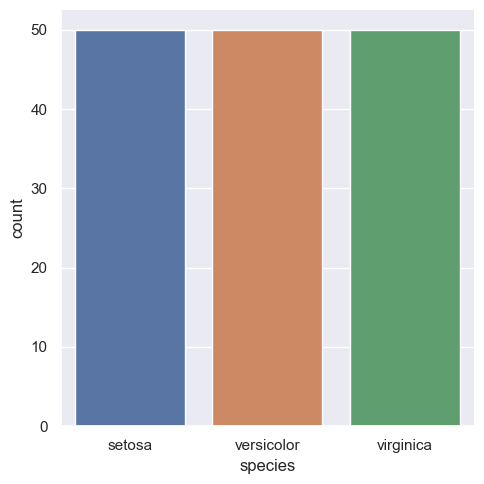

In [22]:
sns.catplot(x="species", data=iris, kind='count')

### Exercise 2

Create a graph to find the relationship between the sepal length and sepal width of each species.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

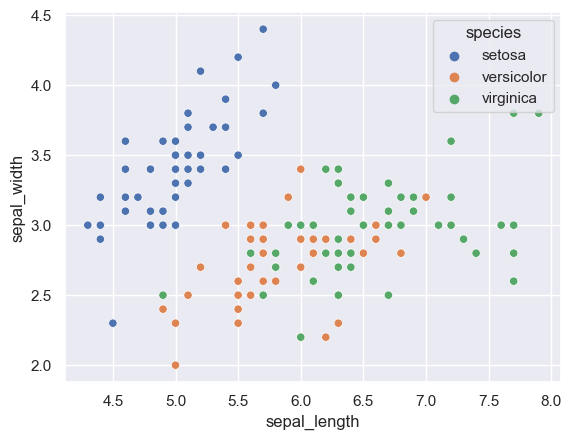

In [37]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

### Exercise 3

Create a graph to find the relationship between the petal length and petal width of each species.

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

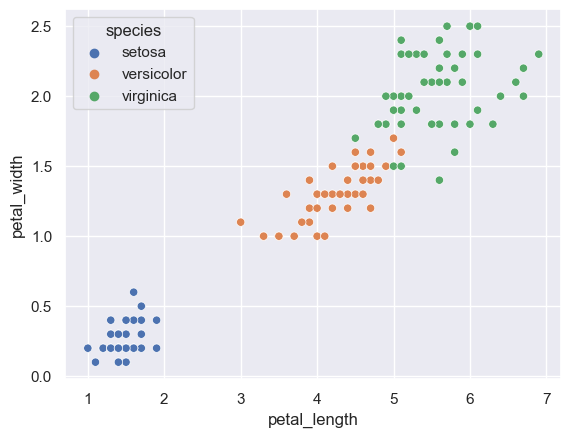

In [38]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

### Exercise 4

Create 4 graphs to visualize the distribution of the sepal length, sepal width, petal length, and petal width.

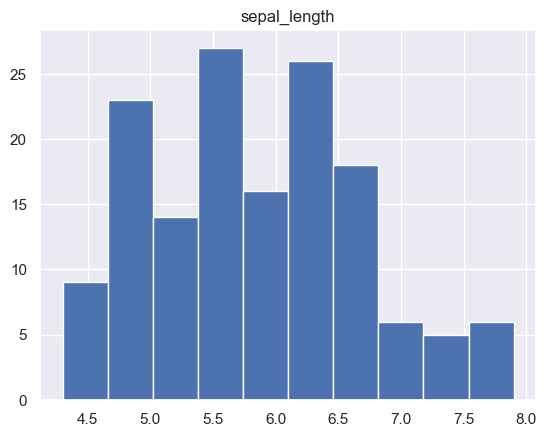

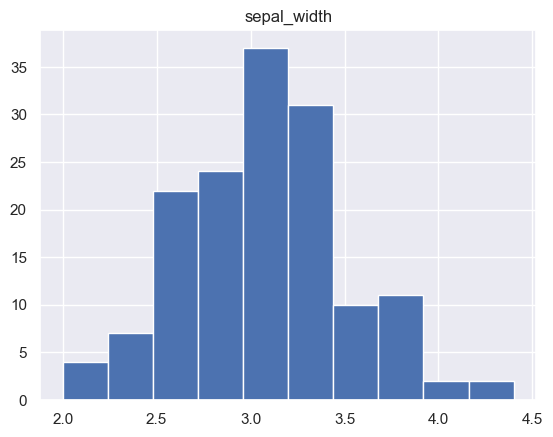

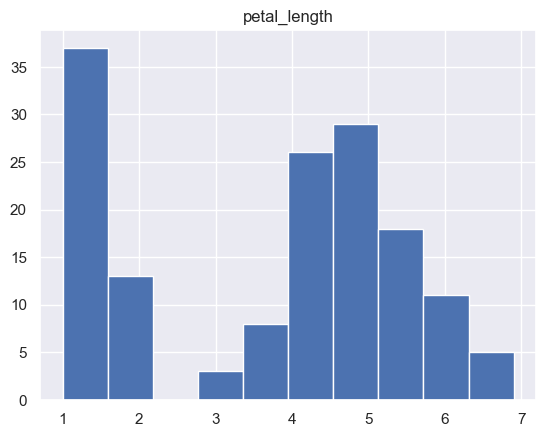

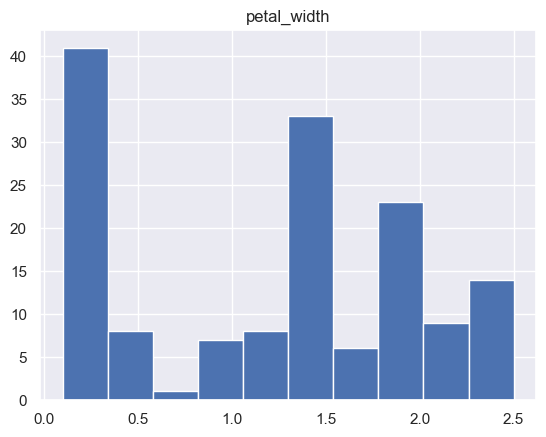

In [109]:
for i, col in enumerate(iris.columns[:4]):
    plt.figure(i)
    plt.hist(iris[col])
    plt.title(col)

### Exercise 5

Create a jointplot to describe individual distributions on the same plot between sepal length and sepal width.

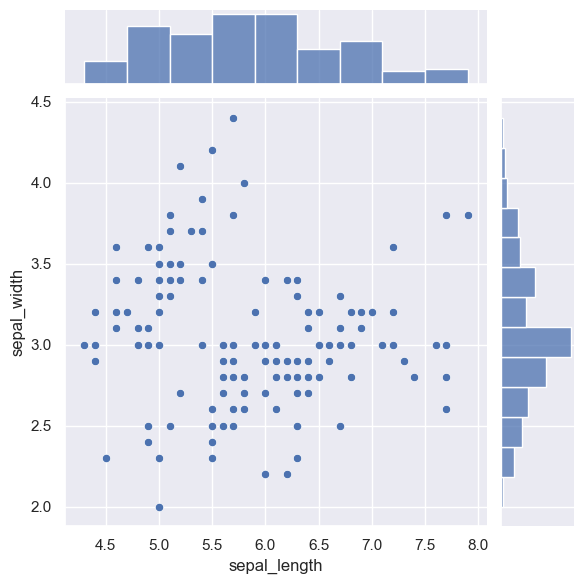

In [110]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)

### Exercise 6

Create a jointplot using hexagonal bins to describe individual distributions on the same plot between sepal length and sepal width.

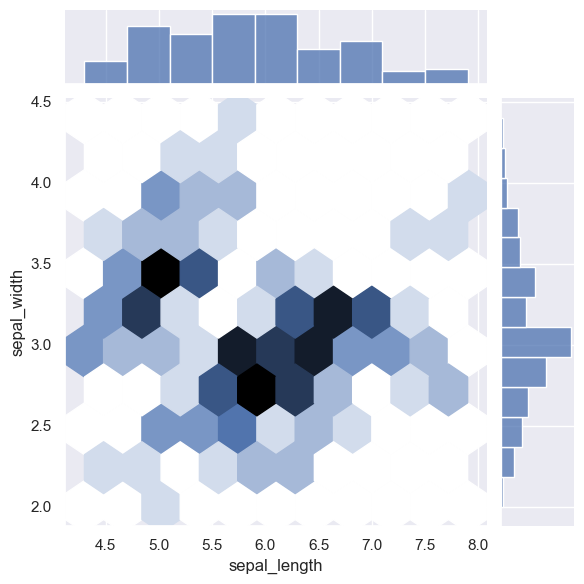

In [111]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='hex')

### Exercise 7

Create a jointplot using kernel density estimation to describe individual distributions between sepal length and sepal width.

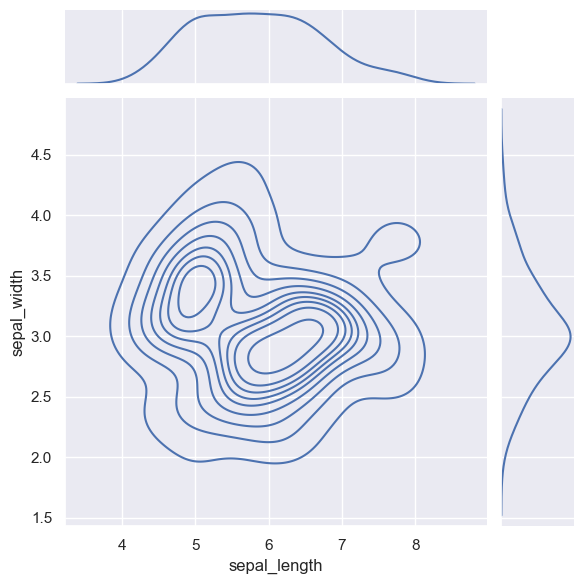

In [112]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='kde')

### Exercise 8

Create a jointplot and add regression and KDE to describe individual distributions on the same plot between sepal length and sepal width.

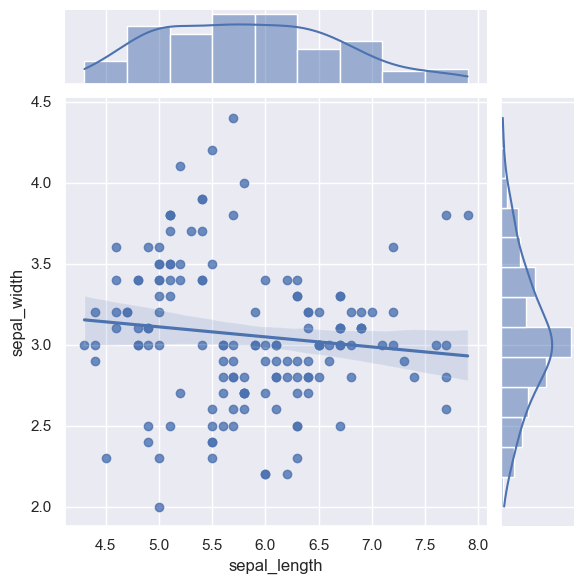

In [113]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='reg')

### Exercise 9

Create a pairplot of the Iris data based on species.

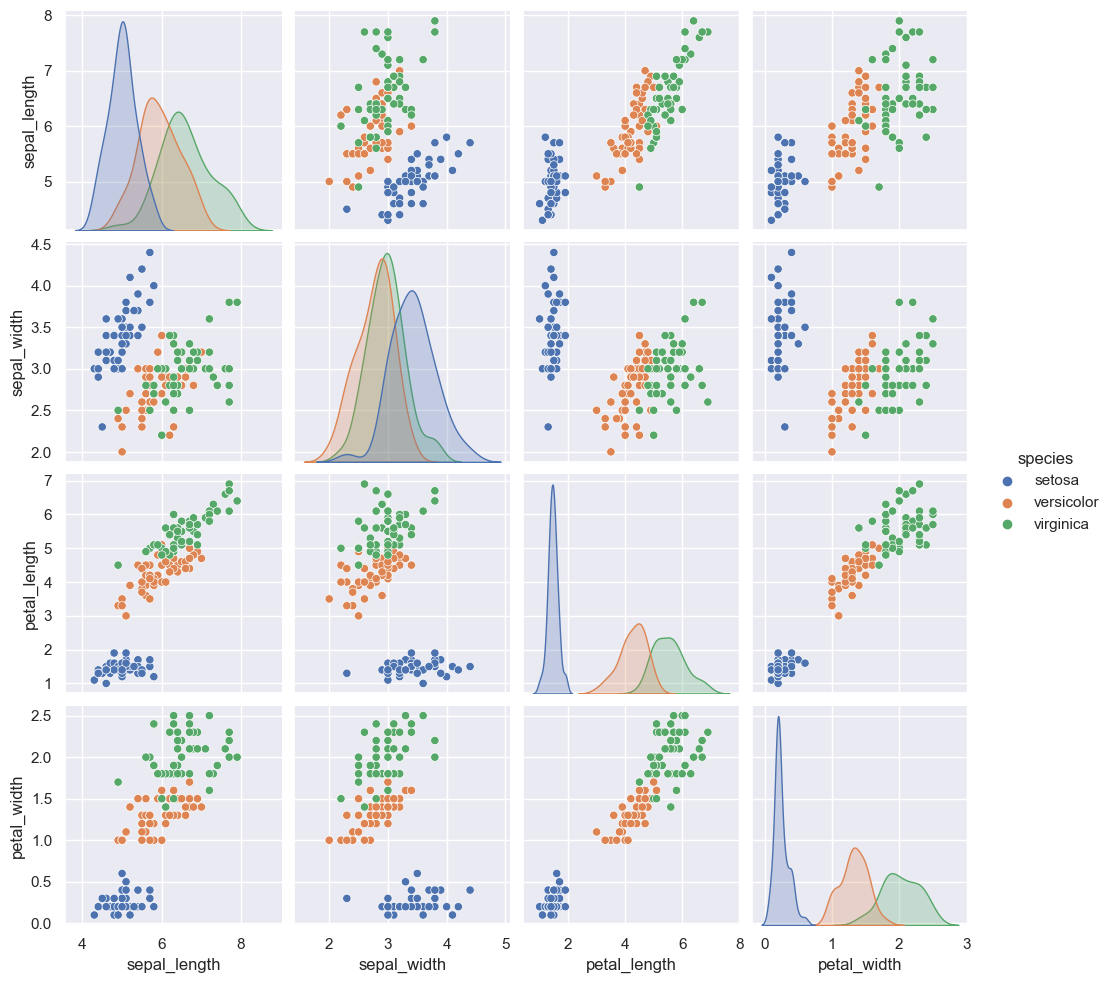

In [114]:
sns.pairplot(iris, hue='species')

### Exercise 10

Find the correlation between the independent variables of the Iris data and create a heatmap to present their relationships.

In [118]:
x = iris.iloc[:, :4]
correl = x.corr()
correl

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

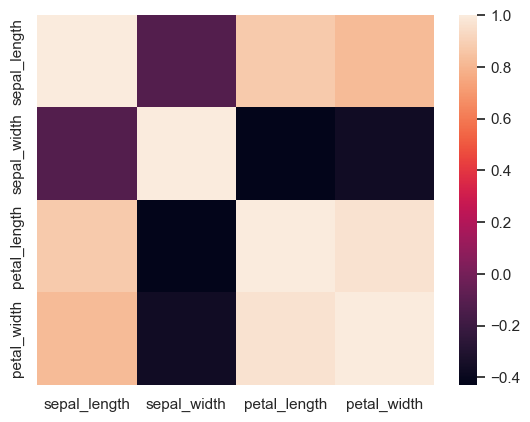

In [119]:
sns.heatmap(correl)

### Exercise 11

Conduct a principal component analysis (PCA) of the Iris dataset to reduce the number of dimensions from 4 to 2. Remember to create a features matrix with the independent variables first. Plot the results.

In [120]:
X_iris = iris.drop('species', axis=1)

In [121]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

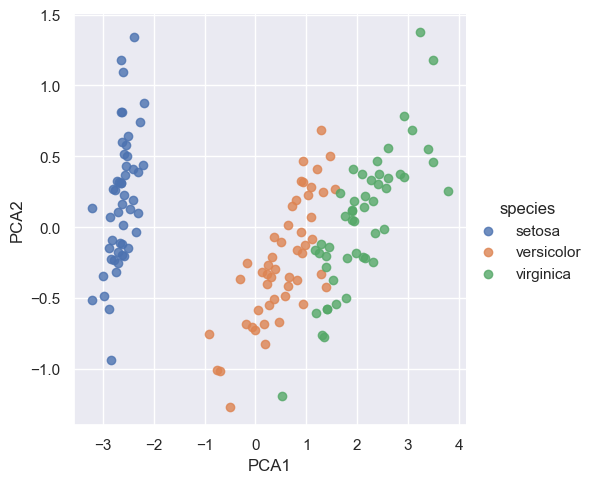

In [122]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

## C. Machine Learning Algorithms

In this section, utilize at least 3 machine learning algorithms (either discussed in class or from research you've conducted on your own) to create some models for this data.

Some options include:

- Gaussian mixture model (clustering)
- K-nearest neighbors (clustering)
- Gaussian naive Bayes (classification)
- Logistic regression (classification)

Split the Iris dataset into a training set and a testing set. Choose a class of model, instantiate the model instance with hyperparameters, fit the model, and produce some output (e.g., clusters, confusion matrices, etc.).